In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
# 2020년 1월부터 6월까지 데이터
df1 = pd.read_csv('data/한국전력공사_전기차충전소충전량(202001_202006).csv', encoding='cp949')

# 2020년 7월부터 12월까지 데이터
df2 = pd.read_csv('data/한국전력공사_전기차충전소충전량(202007_202012).csv', encoding='cp949')

# 두 데이터프레임을 병합
df = pd.concat([df1, df2], ignore_index=True)

# 병합된 데이터프레임 출력
print(df)

           본부     사업소             충전소명   충전기  충전기ID  \
0          서울    마포용산        용산역 아이파크몰  급속04    723   
1          경기    경기직할          영통공영주차장  급속02   1184   
2        광주전남     서광주     효천2지구 중흥S클래스  급속01   8462   
3        경기북부  경기북부직할      양주자이2단지 아파트  완속02   2196   
4          인천     남인천          서창LH6단지  완속01   5445   
...       ...     ...              ...   ...    ...   
2056633    경기     서수원          동탄신일유토빌  완속03   7756   
2056634    인천     서인천       청라롯데캐슬 아파트  완속03   2002   
2056635   남서울      강남          타워팰리스G동  완속02   2925   
2056636    대구     남대구  상인역e편한세상2단지 아파트  완속01   2135   
2056637  경기북부      고양  식사동 일산자이2단지 아파트  완속04   1536   

                                                   주소 충전기구분  충전용량    충전량  \
0                   서울특별시 용산구 한강대로23길 55 (한강로3가, 용산역)    급속  50.0  22.31   
1                                경기도 수원시 영통구 봉영로 1598    급속  50.0  32.85   
2        광주광역시 남구 효우로 332-11 (행암동, 효천2지구 중흥S-클래스 아파트)    급속  50.0  17.65   
3                           경기도 양주시

In [3]:
df = df.drop('충전기ID', axis=1)
df

,본부,사업소,충전소명,충전기,주소,충전기구분,충전용량,충전량,충전시간,충전분,충전종료일자,충전시작시각,충전종료시각
0,서울,마포용산,용산역 아이파크몰,급속04,"서울특별시 용산구 한강대로23길 55 (한강로3가, 용산역)",급속,50.0,22.31,0,34,2020-01-01,2020-01-01 21:33:00,2020-01-01 22:07:00
1,경기,경기직할,영통공영주차장,급속02,경기도 수원시 영통구 봉영로 1598,급속,50.0,32.85,1,31,2020-01-01,2020-01-01 20:40:00,2020-01-01 22:11:00
2,광주전남,서광주,효천2지구 중흥S클래스,급속01,"광주광역시 남구 효우로 332-11 (행암동, 효천2지구 중흥S-클래스 아파트)",급속,50.0,17.65,0,31,2020-01-01,2020-01-01 21:39:00,2020-01-01 22:11:00
3,경기북부,경기북부직할,양주자이2단지 아파트,완속02,경기도 양주시 삼숭동 삼숭로38번길 78-12,완속,7.0,8.50,2,41,2020-01-01,2020-01-01 20:05:00,2020-01-01 22:46:00
4,인천,남인천,서창LH6단지,완속01,인천광역시 남동구 서창남순환로 190-100,완속,7.0,12.70,2,51,2020-01-01,2020-01-01 16:17:00,2020-01-01 19:09:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2056633,경기,서수원,동탄신일유토빌,완속03,경기도 화성시 동탄반석로 232,완속,7.0,18.96,6,10,2020-12-03,2020-12-02 23:04,2020-12-03 5:14
2056634,인천,서인천,청라롯데캐슬 아파트,완속03,인천광역시 서구 청라커낼로 252,완속,7.0,37.80,5,44,2020-12-03,2020-12-02 23:31,2020-12-03 5:16
2056635,남서울,강남,타워팰리스G동,완속02,서울특별시 강남구 도곡동 언주로30길 26,완속,7.0,52.16,9,37,2020-12-03,2020-12-02 19:40,2020-12-03 5:17
2056636,대구,남대구,상인역e편한세상2단지 아파트,완속01,대구광역시 달서구 상인동 월서로3길 15,완속,7.0,39.77,6,22,2020-12-03,2020-12-02 23:02,2020-12-03 5:25


In [4]:
df[['시', '구', '도로명주소']] = df['주소'].str.split(' ', n=2, expand=True)
df.head(3)

,본부,사업소,충전소명,충전기,주소,충전기구분,충전용량,충전량,충전시간,충전분,충전종료일자,충전시작시각,충전종료시각,시,구,도로명주소
0,서울,마포용산,용산역 아이파크몰,급속04,"서울특별시 용산구 한강대로23길 55 (한강로3가, 용산역)",급속,50.0,22.31,0,34,2020-01-01,2020-01-01 21:33:00,2020-01-01 22:07:00,서울특별시,용산구,"한강대로23길 55 (한강로3가, 용산역)"
1,경기,경기직할,영통공영주차장,급속02,경기도 수원시 영통구 봉영로 1598,급속,50.0,32.85,1,31,2020-01-01,2020-01-01 20:40:00,2020-01-01 22:11:00,경기도,수원시,영통구 봉영로 1598
2,광주전남,서광주,효천2지구 중흥S클래스,급속01,"광주광역시 남구 효우로 332-11 (행암동, 효천2지구 중흥S-클래스 아파트)",급속,50.0,17.65,0,31,2020-01-01,2020-01-01 21:39:00,2020-01-01 22:11:00,광주광역시,남구,"효우로 332-11 (행암동, 효천2지구 중흥S-클래스 아파트)"


In [5]:
gwangju = df[df['시'] == '광주광역시']
gwangju

,본부,사업소,충전소명,충전기,주소,충전기구분,충전용량,충전량,충전시간,충전분,충전종료일자,충전시작시각,충전종료시각,시,구,도로명주소
2,광주전남,서광주,효천2지구 중흥S클래스,급속01,"광주광역시 남구 효우로 332-11 (행암동, 효천2지구 중흥S-클래스 아파트)",급속,50.0,17.65,0,31,2020-01-01,2020-01-01 21:39:00,2020-01-01 22:11:00,광주광역시,남구,"효우로 332-11 (행암동, 효천2지구 중흥S-클래스 아파트)"
38,광주전남,광산,선운이지더원1단지,완속01,"광주광역시 광산구 선운로20번길 47 (선암동, 광주 선운지구 EG the1 1단지)",완속,7.0,26.83,4,31,2020-01-01,2020-01-01 18:12:00,2020-01-01 22:43:00,광주광역시,광산구,"선운로20번길 47 (선암동, 광주 선운지구 EG the1 1단지)"
41,광주전남,광산,하남2지구 중흥S-클래스,완속02,"광주광역시 광산구 목련로21번길 20 (산정동, 하남2지구 중흥S-클래스)",완속,7.0,11.91,1,56,2020-01-01,2020-01-01 21:08:00,2020-01-01 23:05:00,광주광역시,광산구,"목련로21번길 20 (산정동, 하남2지구 중흥S-클래스)"
58,광주전남,광주전남직할,월남 호반베르디움2차,완속01,"광주광역시 동구 남문로 307 (월남동, 월남호반베르디움 2차)",완속,7.0,11.76,3,54,2020-01-01,2020-01-01 20:00:00,2020-01-01 23:54:00,광주광역시,동구,"남문로 307 (월남동, 월남호반베르디움 2차)"
100,광주전남,광산,수완대방노블랜드3차아파트,완속02,"광주광역시 광산구 풍영로170번길 39-10 (장덕동, 성덕마을 대방노블랜드3차)",완속,7.0,12.33,4,9,2020-01-01,2020-01-01 18:13:00,2020-01-01 22:23:00,광주광역시,광산구,"풍영로170번길 39-10 (장덕동, 성덕마을 대방노블랜드3차)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2056457,광주전남,서광주,상무버들1단지,완속01,"광주광역시 서구 상무버들로40번길 14 (유촌동, 상무버들마을1주공아파트)",완속,7.0,49.80,8,0,2020-12-03,2020-12-02 18:41,2020-12-03 2:42,광주광역시,서구,"상무버들로40번길 14 (유촌동, 상무버들마을1주공아파트)"
2056471,광주전남,서광주,광천e편한세상아파트,급속01,"광주광역시 서구 화운로 278 (광천동, 광천 e편한세상)",급속,50.0,40.96,9,39,2020-12-03,2020-12-02 23:09,2020-12-03 8:49,광주광역시,서구,"화운로 278 (광천동, 광천 e편한세상)"
2056507,광주전남,광주전남직할,무등파크맨션3차,완속01,"광주광역시 동구 의재로 123 (운림동, 무등파크맨션)",완속,7.0,25.19,4,26,2020-12-03,2020-12-02 23:50,2020-12-03 4:16,광주광역시,동구,"의재로 123 (운림동, 무등파크맨션)"
2056551,광주전남,광산,우산국제미소래아파트,완속01,"광주광역시 광산구 용아로 175 (우산동, 국제미소래아파트)",완속,7.0,49.19,7,47,2020-12-03,2020-12-02 21:05,2020-12-03 4:52,광주광역시,광산구,"용아로 175 (우산동, 국제미소래아파트)"


In [6]:
gwangju = gwangju.drop_duplicates().reset_index(drop=True)
gwangju

,본부,사업소,충전소명,충전기,주소,충전기구분,충전용량,충전량,충전시간,충전분,충전종료일자,충전시작시각,충전종료시각,시,구,도로명주소
0,광주전남,서광주,효천2지구 중흥S클래스,급속01,"광주광역시 남구 효우로 332-11 (행암동, 효천2지구 중흥S-클래스 아파트)",급속,50.0,17.65,0,31,2020-01-01,2020-01-01 21:39:00,2020-01-01 22:11:00,광주광역시,남구,"효우로 332-11 (행암동, 효천2지구 중흥S-클래스 아파트)"
1,광주전남,광산,선운이지더원1단지,완속01,"광주광역시 광산구 선운로20번길 47 (선암동, 광주 선운지구 EG the1 1단지)",완속,7.0,26.83,4,31,2020-01-01,2020-01-01 18:12:00,2020-01-01 22:43:00,광주광역시,광산구,"선운로20번길 47 (선암동, 광주 선운지구 EG the1 1단지)"
2,광주전남,광산,하남2지구 중흥S-클래스,완속02,"광주광역시 광산구 목련로21번길 20 (산정동, 하남2지구 중흥S-클래스)",완속,7.0,11.91,1,56,2020-01-01,2020-01-01 21:08:00,2020-01-01 23:05:00,광주광역시,광산구,"목련로21번길 20 (산정동, 하남2지구 중흥S-클래스)"
3,광주전남,광주전남직할,월남 호반베르디움2차,완속01,"광주광역시 동구 남문로 307 (월남동, 월남호반베르디움 2차)",완속,7.0,11.76,3,54,2020-01-01,2020-01-01 20:00:00,2020-01-01 23:54:00,광주광역시,동구,"남문로 307 (월남동, 월남호반베르디움 2차)"
4,광주전남,광산,수완대방노블랜드3차아파트,완속02,"광주광역시 광산구 풍영로170번길 39-10 (장덕동, 성덕마을 대방노블랜드3차)",완속,7.0,12.33,4,9,2020-01-01,2020-01-01 18:13:00,2020-01-01 22:23:00,광주광역시,광산구,"풍영로170번길 39-10 (장덕동, 성덕마을 대방노블랜드3차)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57267,광주전남,서광주,상무버들1단지,완속01,"광주광역시 서구 상무버들로40번길 14 (유촌동, 상무버들마을1주공아파트)",완속,7.0,49.80,8,0,2020-12-03,2020-12-02 18:41,2020-12-03 2:42,광주광역시,서구,"상무버들로40번길 14 (유촌동, 상무버들마을1주공아파트)"
57268,광주전남,서광주,광천e편한세상아파트,급속01,"광주광역시 서구 화운로 278 (광천동, 광천 e편한세상)",급속,50.0,40.96,9,39,2020-12-03,2020-12-02 23:09,2020-12-03 8:49,광주광역시,서구,"화운로 278 (광천동, 광천 e편한세상)"
57269,광주전남,광주전남직할,무등파크맨션3차,완속01,"광주광역시 동구 의재로 123 (운림동, 무등파크맨션)",완속,7.0,25.19,4,26,2020-12-03,2020-12-02 23:50,2020-12-03 4:16,광주광역시,동구,"의재로 123 (운림동, 무등파크맨션)"
57270,광주전남,광산,우산국제미소래아파트,완속01,"광주광역시 광산구 용아로 175 (우산동, 국제미소래아파트)",완속,7.0,49.19,7,47,2020-12-03,2020-12-02 21:05,2020-12-03 4:52,광주광역시,광산구,"용아로 175 (우산동, 국제미소래아파트)"


In [19]:
# 일자별 총충전량
gwangju['충전종료일자'] = pd.to_datetime(gwangju['충전종료일자'])

# 일자별, 시간대별 충전량 계산
daily_hourly_charge = gwangju.groupby([gwangju['충전종료일자'].dt.date, gwangju['구']])['충전량'].sum()

# 일자 컬럼 추가
daily_hourly_charge_df = pd.DataFrame({'일자': [i[0] for i in daily_hourly_charge.index],
                                       '구': [i[1] for i in daily_hourly_charge.index],
                                       '충전량': daily_hourly_charge.values})

# 월별 컬럼 추가
daily_hourly_charge_df['월'] = daily_hourly_charge_df['일자'].apply(lambda x: x.month)

# 년도 컬럼 추가
daily_hourly_charge_df['년'] = daily_hourly_charge_df['일자'].apply(lambda x: x.year)

# 월별 컬럼에 일자별 충전량 매핑
monthly_charge = daily_hourly_charge_df.groupby(['년', '월', '구'])['충전량'].sum().unstack()

monthly_charge

구              광산구        남구        동구           북구          서구
년    월                                                         
2020 1   33858.748  10002.04  10188.62   60180.1700  57015.3900
     2   27679.322   8859.74   8290.67   55596.2300  52196.1560
     3   30470.560   8409.33   9245.30   48137.7700  47398.3240
     4   33526.232   8769.49   9157.15   52862.1900  51840.7000
     5   32933.314   9270.69   9233.28   50325.2000  56475.7700
     6   30262.708   8676.86   9470.55   35360.0100  38701.4760
     7   33434.054   8357.87   9611.50   71741.9300  50329.2820
     8   36713.836   9453.40  11165.87   33874.4600  55512.3560
     9   31952.030   8598.93   9993.77   50573.4400  45393.9430
     10  35723.194  10219.07  11197.66   96003.9000  51124.4109
     11  33923.370  10608.68  12150.37  133830.2199  50104.4310
     12   3626.322    919.30   1243.69   20168.6808   5895.2500

In [20]:
monthly_charge

구              광산구        남구        동구           북구          서구
년    월                                                         
2020 1   33858.748  10002.04  10188.62   60180.1700  57015.3900
     2   27679.322   8859.74   8290.67   55596.2300  52196.1560
     3   30470.560   8409.33   9245.30   48137.7700  47398.3240
     4   33526.232   8769.49   9157.15   52862.1900  51840.7000
     5   32933.314   9270.69   9233.28   50325.2000  56475.7700
     6   30262.708   8676.86   9470.55   35360.0100  38701.4760
     7   33434.054   8357.87   9611.50   71741.9300  50329.2820
     8   36713.836   9453.40  11165.87   33874.4600  55512.3560
     9   31952.030   8598.93   9993.77   50573.4400  45393.9430
     10  35723.194  10219.07  11197.66   96003.9000  51124.4109
     11  33923.370  10608.68  12150.37  133830.2199  50104.4310
     12   3626.322    919.30   1243.69   20168.6808   5895.2500

In [ ]:
# 202001_202012 구별 충전량저장
# monthly_charge.to_csv('광주광역시_전기차_충전소_월별_충전량_20200914.csv', encoding='cp949')

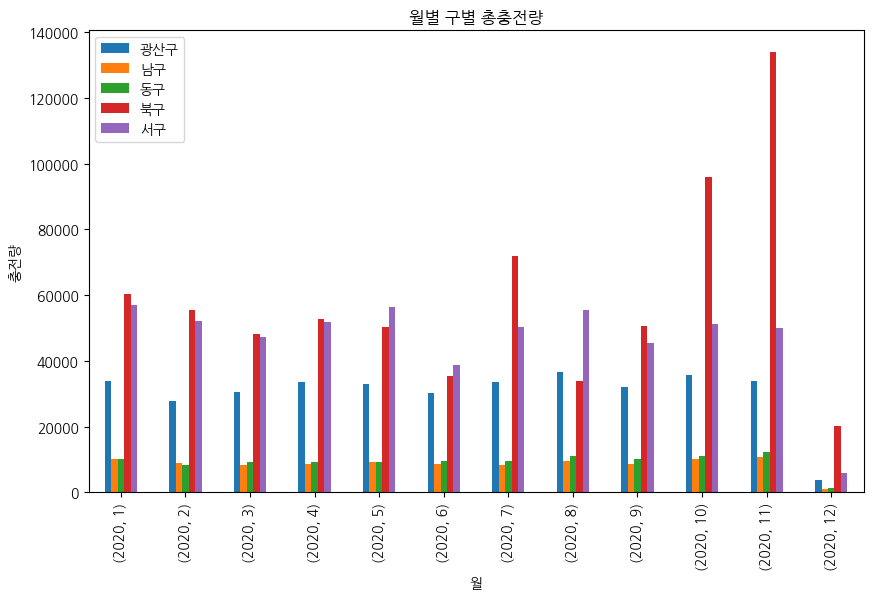

In [21]:
monthly_charge.plot(kind='bar', figsize=(10, 6))
plt.title('월별 구별 총충전량')
plt.xlabel('월')
plt.ylabel('충전량')
plt.legend(loc='best')
plt.show()

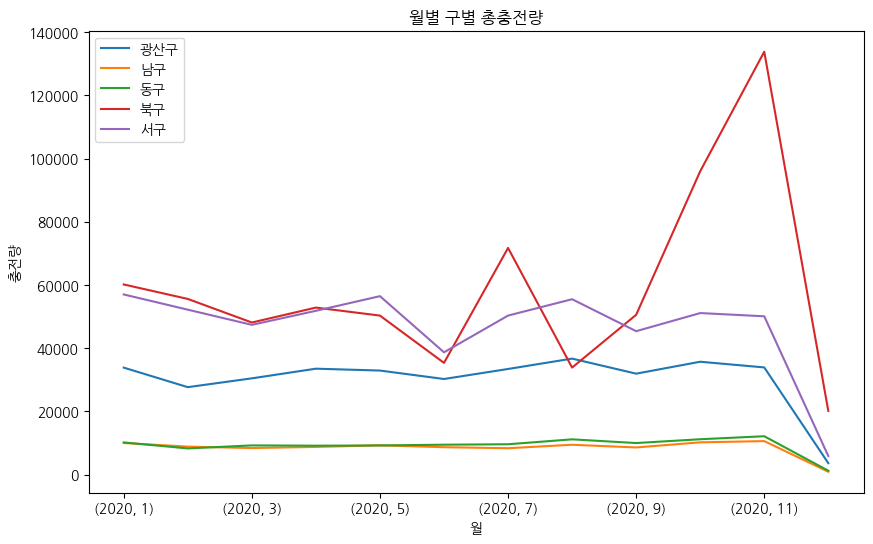

In [22]:
monthly_charge.plot(kind='line', figsize=(10, 6))
plt.title('월별 구별 총충전량')
plt.xlabel('월')
plt.ylabel('충전량')
plt.legend(loc='best')
plt.show()

<AxesSubplot:xlabel='구', ylabel='충전량'>

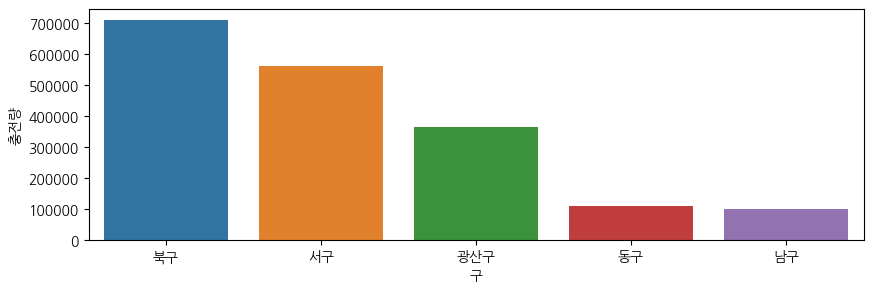

In [24]:
# 구별 충전량
gwangju_gu = gwangju.groupby('구')['충전량'].sum().sort_values(ascending=False)
gwangju_gu = gwangju_gu.reset_index()
gwangju_gu
plt.figure(figsize=(10,3))
sns.barplot(data=gwangju_gu,x='구',y='충전량')

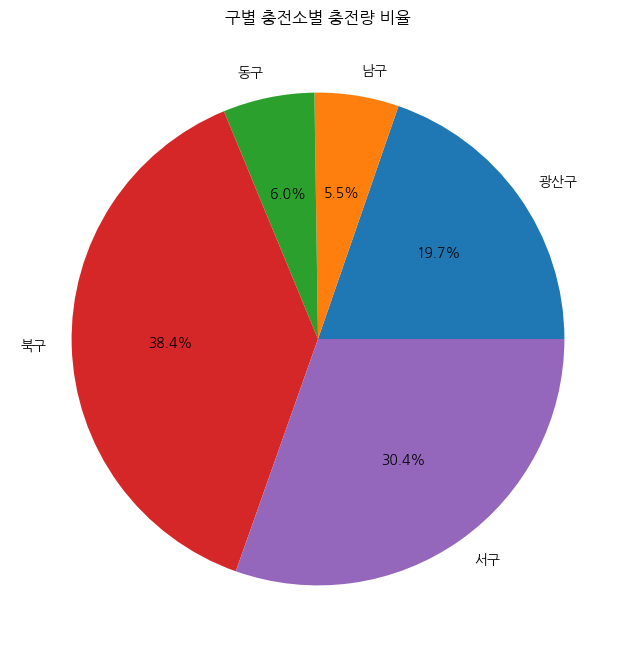

In [25]:
# 구별 충전량 비율
df_charge = gwangju[['구', '충전량']]
df_charge_sum = df_charge.groupby('구').sum()

df_charge_sum.plot(kind='pie', y='충전량', legend=False, autopct='%1.1f%%', figsize=(8,8))
plt.title('구별 충전소별 충전량 비율')
plt.ylabel('')
plt.show()

In [27]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

subfig = make_subplots(
    rows=1, cols=2,
    column_widths=[10, 10],
    row_heights=[10],
    subplot_titles=("구별 총 충전량 비율", "구별 총 충전량"),
    specs=[[{"type": "pie"}, {"type": "bar"}]])

# gwangju 데이터프레임에서 '구'별 '충전량' 합계를 계산
gwangju_gu = gwangju.groupby('구')['충전량'].sum().sort_values(ascending=False)

subfig.add_trace(
    go.Pie(labels=gwangju_gu.index, values=gwangju_gu.values, showlegend=True), 1, 1)

bar_trace = go.Bar(x=gwangju_gu.index, y=gwangju_gu.values, showlegend=False,
                   marker=dict(color=['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A']))
subfig.add_trace(bar_trace, 1, 2)

subfig.update_layout(template="plotly_dark", title='2020년 구별 총 충전량')
subfig.show()
# 구별 총 충전량을 시각화